In [1]:
from pathlib import Path

from synthius.model import ModelFitter, ModelLoader

/storage/.dsw_env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-10-21 15:05:35.676931: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-10-21 15:05:35.705820: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-10-21 15:05:35.705884: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-10-21 15:05:35.728682: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optim

In [ ]:
train_data = Path("data/train.csv")  # TODO: Change this to the path of the training dataset (to generate synthetic data from)
test_data = Path("data/test.csv")  # TODO: Change this to the path of the test dataset (to generate syntehtic data from)
synt_path = Path("synthetic_data")  # TODO: Change this to the path of the synthetic data directory (for generated datasets)
models_path = Path("models")  # TODO: Change this to the path of the models directory (where you store the models trained!)

synthetic_data_paths = [
    synt_path / "CopulaGAN.csv",
    synt_path / "CTGAN.csv",
    synt_path / "GaussianCopula.csv",
    synt_path / "TVAE.csv",
    synt_path / "GaussianMultivariate.csv",
    synt_path / "ARF.csv",
    # synt_path / "WGAN.csv",
]

TARGET = "target_binary"  # TODO: Change this to the target column
POS_LABEL = 1  # TODO: Change this to the positive label
# If it's a binary classification problem, use TRUE without quotation marks

In [3]:
for syn_path in synthetic_data_paths:
    ModelFitter(
        data_path=syn_path,
        label_column=TARGET,
        experiment_name=syn_path.stem,
        models_base_path=models_path,
        test_data_path=test_data,
        pos_label=POS_LABEL,
    )

ModelFitter(
    data_path=train_data,
    label_column=TARGET,
    experiment_name="Original",
    models_base_path=models_path,
    test_data_path=test_data,
    pos_label=POS_LABEL,
)

/storage/.dsw_env/lib/python3.11/site-packages/fastai/torch_core.py:154: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at ../torch/csrc/utils/tensor_numpy.cpp:206.)
  else as_tensor(x.values, **kwargs) if isinstance(x, (pd.Series, pd.DataFrame))
/storage/.dsw_env/lib/python3.11/site-packages/sklearn/compose/_column_transformer.py:975: FutureWarning: The parameter `force_int_remainder_cols` is deprecated and will be removed in 1.9. It has no effect. Leave it to its default value to avoid this warning.
  warnings.warn(
Disabling decision threshold calibration for metric `f1_macro` due to having fewer than 50 rows of validation data for calibration to avoid overfitting (2

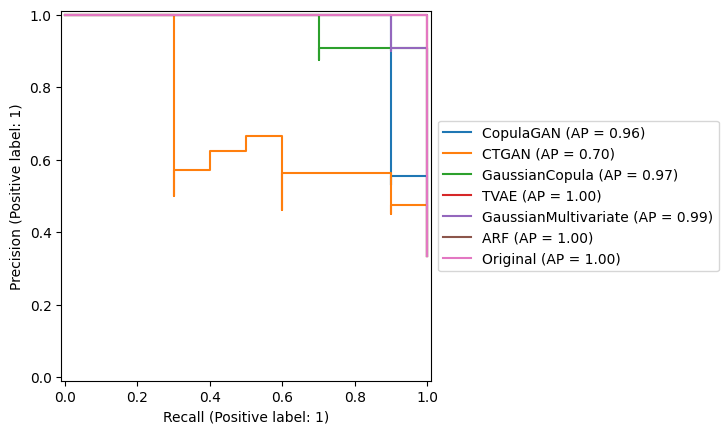

In [4]:
ModelFitter.plot_metrics(pos_label=POS_LABEL)

In [5]:
ModelFitter.display_metrics()

Model Name,ARF,CTGAN,CopulaGAN,GaussianCopula,GaussianMultivariate,Original,TVAE
Metric,,,,,,,
accuracy,1,0.76667,0.83333,0.86667,0.96667,1,0.96667
f1,1,0.46154,0.66667,0.77778,0.94737,1,0.94737
f1_macro,1,0.65630,0.77778,0.84127,0.96149,1,0.96149
f1_weighted,1,0.72122,0.81481,0.86243,0.96620,1,0.96620
precision_macro,1,0.87037,0.90000,0.86932,0.97619,1,0.97619
recall_macro,1,0.65000,0.75000,0.82500,0.95000,1,0.95000
total_true_support,45,40,40,40,48,40,40
true_support,10,10,10,10,10,10,10


In [6]:
experiment_names = [path.stem for path in synthetic_data_paths] + ["Original"]

for exp in experiment_names:
    ModelLoader(
        data_path=test_data,
        label_column=TARGET,
        experiment_name=exp,
        models_base_path=models_path / exp,
        pos_label=POS_LABEL,
        need_split=False,
    )

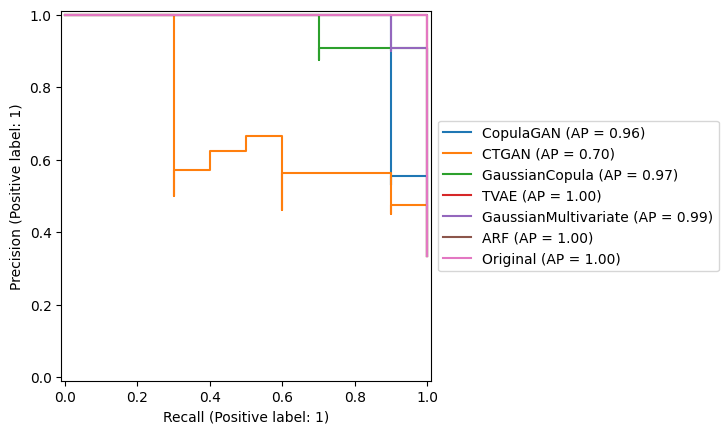

In [7]:
plot = ModelLoader.plot_metrics(pos_label=POS_LABEL)

In [8]:
ModelLoader.display_metrics()

Model Name,ARF,CTGAN,CopulaGAN,GaussianCopula,GaussianMultivariate,Original,TVAE
Metric,,,,,,,
Predict_True,10,3,5,8,9,10,9
accuracy,1,0.76667,0.83333,0.86667,0.96667,1,0.96667
f1,1,0.46154,0.66667,0.77778,0.94737,1,0.94737
f1_macro,1,0.65630,0.77778,0.84127,0.96149,1,0.96149
f1_weighted,1,0.72122,0.81481,0.86243,0.96620,1,0.96620
precision_macro,1,0.87037,0.90000,0.86932,0.97619,1,0.97619
recall_macro,1,0.65000,0.75000,0.82500,0.95000,1,0.95000
